<a href="https://colab.research.google.com/github/st3vejobs/DATA-602-Assignment-10/blob/main/DATA_602_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data 602 Assignment 10**

In [2]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [74]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
#print(iris)


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [75]:
iris_data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [76]:
knn = KNN(n_neighbors = 5)
iris_data = iris_data.rename(columns = {'sepal length (cm)':'sepal length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})
X = iris_data[['sepal length','sepal width', 'petal length', 'petal width']]
#iris_data['species'] = None
species_dict = {0:'setosa', 1:'versicolor', 2:'virginica'}
#print(species_dict.keys())

y = []
y = np.array(y)
for i in range(len(iris.target)):
  y = np.append(y,species_dict[iris.target[i]])
  #print(species_dict[iris.target[i]])
#print(y)
#idx = np.nonzero(species_dict.keys() == np.array(iris.target)[:,None])[1]
#print(idx)
#species = np.asarray(species_dict.values())[idx]
#print(species)
#print(iris.target[5])
#y = iris.target
#print(y)
#print(iris_data.head())
knn.fit(X,y)

new_observations = [[5,3.5,1.4,0.2],[4,3.3,1.6,0.3],[7,3,6,2],[8,3,4,1],[4,2.6,0.8,0.7],[7,3.5,6,0.2]]
result = knn.predict(new_observations)
#knn.predict(X)
print(f'The predicted species for the input of {new_observations} is:')
print()
print(result)

The predicted species for the input of [[5, 3.5, 1.4, 0.2], [4, 3.3, 1.6, 0.3], [7, 3, 6, 2], [8, 3, 4, 1], [4, 2.6, 0.8, 0.7], [7, 3.5, 6, 0.2]] is:

['setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

Maximum Correct:  30 at K = 33


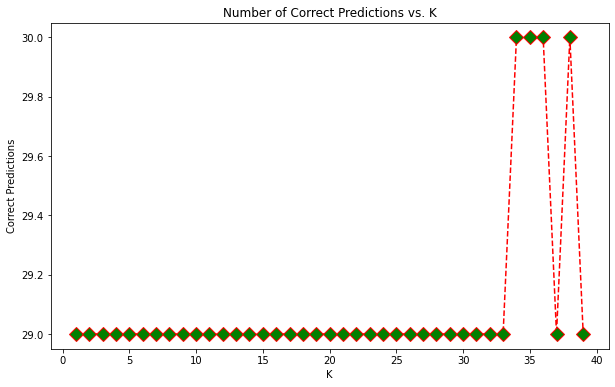

In [97]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2)

correct = []
for i in range(1,40):
 knn = KNN(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 correct.append(np.sum(pred_i == y_test))
#print(pred_i != y_test)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),correct,color='red', linestyle='dashed', 
         marker='D',markerfacecolor='green', markersize=10)
plt.title('Number of Correct Predictions vs. K')
plt.xlabel('K')
plt.ylabel('Correct Predictions')
if correct.index(max(correct)) > 0:
  print("Maximum Correct: ",max(correct),"at K =",correct.index(max(correct)))
else:
  print("Maximum Correct: ",max(correct),"at K =",1)
# Code source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb


In [98]:

knn = KNN(n_neighbors = correct.index(max(correct)))
knn.fit(X_train, y_train)
test = knn.predict(X_test)
print(f'Expected: {y_test}')
print(f'Received: {test}')
wrong = 0
for i in range(len(y_test)):
  if y_test[i] != test[i]:
    wrong += 1

print()
print(f'Score: {wrong} incorrect out of {len(y_test)} total data points.')

print("Accuracy:",metrics.accuracy_score(y_test, test))


Expected: ['versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'setosa']
Received: ['versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'setosa']

Score: 1 incorrect out of 30 total data points.
Accuracy: 0.9666666666666667


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

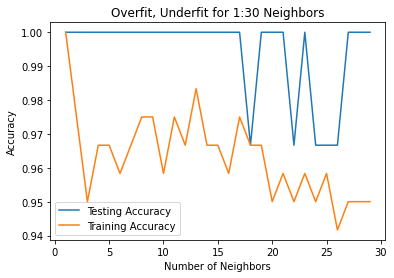

In [72]:
neighbors = np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
 knn = KNN(n_neighbors=k)
 knn.fit(X_train,y_train)
 train_accuracy[i] = knn.score(X_train, y_train)
 test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Overfit, Underfit for 1:30 Neighbors')
plt.show()



Our optimal number of neighbors looks to be 13. We begin to underfit the data at k = 18.

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [5]:
boston = ds.load_boston()
boston_data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
print(boston_data.head())
#print(boston)
MEDV = np.median(boston.target)
avage = np.mean(boston_data['AGE'])
target = np.array(boston.target)
print(target)
print()
print(f'The median home value is: {MEDV}')
print(f'The average age is: {avage}')

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

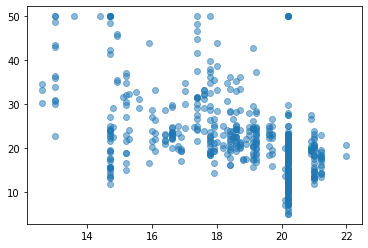

In [9]:
plt.scatter(boston_data['PTRATIO'], target, alpha=0.5)
plt.show()
PTRATIO = np.array(boston_data['PTRATIO'])

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

#### Least-Squares Polynomial Fit:

Linear

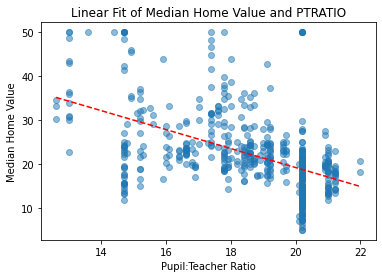

In [26]:
#m = np.polyfit(PTRATIO, boston.target,1)
#fit_1d = np.poly1d(m)

m,b = np.polyfit(PTRATIO, boston.target, 1)

# sequence from minimum x value (PTRATIO) to maximum x value (PTRATIO)
x = np.linspace(np.min(PTRATIO), np.max(PTRATIO), num=50)

plt.scatter(boston_data['PTRATIO'], target, alpha=0.5)
plt.plot(x, m*x + b, '--r')
plt.ylabel("Median Home Value")
plt.xlabel("Pupil:Teacher Ratio")
plt.title("Linear Fit of Median Home Value and PTRATIO")
plt.show()

